<p style="font-size:xx-large;">CIPAL - Process tests</p>

In [1]:
from itertools import repeat

import pandas as pd
import seaborn as sns

import cipal

pd.set_option("display.max_rows", None)
sns.set_theme(
    style="white",
    palette="hls",
    rc={
        "figure.dpi": 1000,
        "figure.figsize": (6, 4),
        "axes.grid": True,
        "grid.color": "#D6D6D6",
        "grid.linestyle": ":",
    },
)

%config InlineBackend.figure_format = 'svg'

In [2]:
def round_df(ltm):
    df = cipal.ltm_to_df(ltm)
    df = df.round(0)
    df["pt"] = df["pt"].astype(int)
    return df

# Building a chunk hierarchy

In [3]:
for i in range(1, 41):
    ltm = cipal.new_ltm()
    cipal.learn(list(repeat("a p @L", i)), ltm)
    print("\n" + str(i) + " repetitions of apple")
    print(round_df(ltm))


1 repetitions of apple
  chunks    pt
0      a  1175
1      p  1175
2     @L  1175

2 repetitions of apple
  chunks    pt
0      a  1150
1      p  1150
2     @L  1150

3 repetitions of apple
  chunks    pt
0      a  1126
1      p  1126
2     @L  1126

4 repetitions of apple
  chunks    pt
0      a  1101
1      p  1101
2     @L  1101

5 repetitions of apple
  chunks    pt
0      a  1076
1      p  1076
2     @L  1076

6 repetitions of apple
  chunks    pt
0      a  1052
1      p  1052
2     @L  1052

7 repetitions of apple
  chunks    pt
0      a  1027
1      p  1027
2     @L  1027

8 repetitions of apple
  chunks    pt
0      a  1003
1      p  1003
2     @L  1003

9 repetitions of apple
  chunks   pt
0      a  978
1      p  978
2     @L  978

10 repetitions of apple
  chunks   pt
0      a  954
1      p  954
2     @L  954

11 repetitions of apple
  chunks   pt
0      a  930
1      p  930
2     @L  930

12 repetitions of apple
  chunks   pt
0      a  907
1      p  907
2     @L  907

13 r

# Compressing STM with chunks in LTM

In [4]:
def show_stm(utt, chunks):
    speech_rate = 160
    decay_rate = 800
    pt_initial = 1200.0
    ltm = cipal.new_ltm()
    ltm.update({x: 100 for x in chunks})
    df = pd.DataFrame(columns=["time", "stm"])
    stream = utt.split()
    speech_times = list(range(0, (len(stream) * speech_rate) + decay_rate, speech_rate))
    stm = cipal.new_stm()
    for i, t in enumerate(speech_times):
        if i < len(stream):
            cipal.learn_element(stream[i], ltm, pt_initial)
            cipal.add_to_stm(stream[i], stm, ltm, t, decay_rate)
        if len(stm["chunks"]) > 1:
            recode = cipal.find_chunks(stm["chunks"], ltm)
            stm = cipal.compress_stm(recode, stm, ltm, t)
        stm = cipal.decay_stm(stm, t)
        stm_t = " ".join([f"({x})" for x in stm["chunks"]])
        df = pd.concat(
            [df, pd.DataFrame({"time": [t], "stm": [stm_t]})], ignore_index=True
        )
    return df

## Phonemes

In [5]:
chunks = ["I", "t", "s", "O:", "l", "g", "0", "n"]  # It's all gone
show_stm("I t s O: l g 0 n", chunks)

,time,stm
0,0,(I)
1,160,(I) (t)
2,320,(I) (t) (s)
3,480,(I) (t) (s) (O:)
4,640,(I) (t) (s) (O:) (l)
5,800,(t) (s) (O:) (l) (g)
6,960,(s) (O:) (l) (g) (0)
7,1120,(O:) (l) (g) (0) (n)
8,1280,(l) (g) (0) (n)
9,1440,(g) (0) (n)


## Words

In [6]:
sublexical = ["I t", "t s", "g 0", "0 n"]
words = ["I t s", "O: l", "g 0 n"]
chunks = chunks + sublexical + words
show_stm("I t s O: l g 0 n", chunks)

,time,stm
0,0,(I)
1,160,(I t)
2,320,(I t s)
3,480,(I t s) (O:)
4,640,(I t s) (O: l)
5,800,(I t s) (O: l) (g)
6,960,(I t s) (O: l) (g 0)
7,1120,(O: l) (g 0 n)
8,1280,(O: l) (g 0 n)
9,1440,(g 0 n)


## Bigrams

In [7]:
chunks = chunks + ["I t s O: l", "O: l g 0 n"]
show_stm("I t s O: l g 0 n", chunks)

,time,stm
0,0,(I)
1,160,(I t)
2,320,(I t s)
3,480,(I t s) (O:)
4,640,(I t s O: l)
5,800,(I t s O: l) (g)
6,960,(I t s O: l) (g 0)
7,1120,(I t s O: l) (g 0 n)
8,1280,(I t s O: l) (g 0 n)
9,1440,(g 0 n)


## Full utterance

In [8]:
chunks = chunks + ["I t s O: l g 0 n"]
show_stm("I t s O: l g 0 n", chunks)

,time,stm
0,0,(I)
1,160,(I t)
2,320,(I t s)
3,480,(I t s) (O:)
4,640,(I t s O: l)
5,800,(I t s O: l) (g)
6,960,(I t s O: l) (g 0)
7,1120,(I t s O: l g 0 n)
8,1280,(I t s O: l g 0 n)
9,1440,(I t s O: l g 0 n)


# The importance of context variety

In [9]:
input = [
    "w 0 z I t D e@",  # Was it there
    "w 0 z I t D e@",
    "w 0 z I t D e@",
]

In [10]:
ltm = cipal.new_ltm()
for i in range(30):
    cipal.learn(input, ltm)
round_df(ltm)

,chunks,pt
0,w,462
1,0,625
2,z,462
3,I,625
4,t,462
5,D,625
6,e@,610
7,w 0,304
8,z I,473
9,t D,453


In [11]:
input = [
    "D e@ I t w 0 z",  # There it was
    "w 0 z I t D e@",  # Was it there
    "I t w 0 z D e@",  # It was there
]

In [12]:
ltm = cipal.new_ltm()
for i in range(30):
    cipal.learn(input, ltm)
round_df(ltm)

,chunks,pt
0,D,456
1,e@,610
2,I,456
3,t,610
4,w,462
5,0,625
6,z,610
7,w 0,453
8,z I,621
9,t D,621


# Adjusting processing times with a sigmoid function

## Adjustment magnitude

<Axes: xlabel='Current chunk PT (ms)', ylabel='Increase in chunk PT (ms)'>

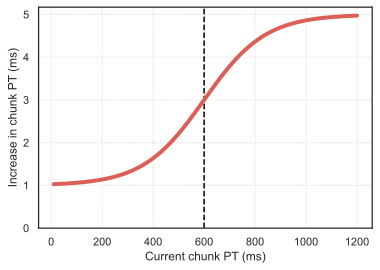

In [13]:
df = pd.DataFrame({"pt": list(range(10, 1201))})
df["adjust"] = list(map(lambda x: cipal.pt_sigmoid(x, 600.0) * 5, df.pt))
p = sns.lineplot(x="pt", y="adjust", data=df, linewidth=4, legend=False)
p.set(xlabel="Current chunk PT (ms)", ylabel="Increase in chunk PT (ms)")
p.axvline(600, 0, 5, linestyle="--", color="black", zorder=1)
p.set_yticks(range(0, 6))
p

## Change in chunk processing times

<Axes: xlabel='Repetitions', ylabel='Chunk processing time (ms)'>

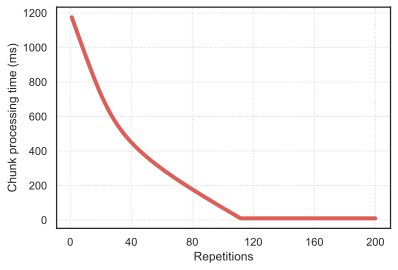

In [14]:
ltm = cipal.new_ltm()
ltm["a p @L"] = 1200.0
df = pd.DataFrame()
for i in range(1, 201):
    cipal.learn(["a p @L"], ltm)
    df = pd.concat(
        [df, pd.DataFrame({"rep": [i], "pt": [ltm["a p @L"]]})], ignore_index=True
    )
p = sns.lineplot(x="rep", y="pt", data=df, linewidth=4, legend=False)
p.set(xlabel="Repetitions", ylabel="Chunk processing time (ms)")
p.set_yticks(range(0, 1400, 200))
p.set_xticks(range(0, 240, 40))
p

# Incremental processing and learning

In [15]:
def print_incremental():
    ltm = cipal.new_ltm()
    speech_rate = 160
    decay_rate = 800
    pt_adjust = -5.0
    pt_initial = 1200.0
    pt_ceiling = 10.0
    corpus = list(repeat("a p @L", 40))
    reps = 0
    for utt in corpus:
        reps += 1
        stream = utt.split()
        speech_times = list(
            range(0, (len(stream) * speech_rate) + decay_rate, speech_rate)
        )
        stm = cipal.new_stm()
        for i, t in enumerate(speech_times):
            if i < len(stream):
                cipal.learn_element(stream[i], ltm, pt_initial)
                cipal.add_to_stm(stream[i], stm, ltm, t, decay_rate)
            if len(stm["chunks"]) > 1:
                cipal.learn_chunks(ltm, stm, t)
                recode = cipal.find_chunks(stm["chunks"], ltm)
                stm = cipal.compress_stm(recode, stm, ltm, t)
            stm = cipal.decay_stm(stm, t)
            cipal.adjust_pt(ltm, stm, pt_adjust, pt_initial, pt_ceiling)

            print("\n" + "=" * 50)
            print(f"{reps} repetitions, time = {t}")
            print("\nLTM CONTENTS:")
            print(round_df(ltm))
            print("\nSTM CONTENTS:")
            print(f"stm = {stm['chunks']}")
            print(f"processing time = {[round(num) for num in stm['process']]}")
            print(f"decay time = {[round(num) for num in stm['decay']]}")

In [16]:
print_incremental()


1 repetitions, time = 0

LTM CONTENTS:
  chunks    pt
0      a  1195

STM CONTENTS:
stm = ['a']
processing time = [1200]
decay time = [800]

1 repetitions, time = 160

LTM CONTENTS:
  chunks    pt
0      a  1190
1      p  1195

STM CONTENTS:
stm = ['a', 'p']
processing time = [1200, 1360]
decay time = [800, 960]

1 repetitions, time = 320

LTM CONTENTS:
  chunks    pt
0      a  1185
1      p  1190
2     @L  1195

STM CONTENTS:
stm = ['a', 'p', '@L']
processing time = [1200, 1360, 1520]
decay time = [800, 960, 1120]

1 repetitions, time = 480

LTM CONTENTS:
  chunks    pt
0      a  1180
1      p  1185
2     @L  1190

STM CONTENTS:
stm = ['a', 'p', '@L']
processing time = [1200, 1360, 1520]
decay time = [800, 960, 1120]

1 repetitions, time = 640

LTM CONTENTS:
  chunks    pt
0      a  1175
1      p  1180
2     @L  1185

STM CONTENTS:
stm = ['a', 'p', '@L']
processing time = [1200, 1360, 1520]
decay time = [800, 960, 1120]

1 repetitions, time = 800

LTM CONTENTS:
  chunks    pt
0      